# Classification of emotions

## Importing the libraries

In [ ]:
import cv2
import zipfile
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **1. Loading the images**

In [ ]:
path = '/content/drive/MyDrive/Masterclass /Masterclass/Datasets/fer_images.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

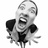

In [ ]:
tf.keras.preprocessing.image.load_img('/content/fer2013/train/Angry/1003.jpg')

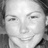

In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/fer2013/train/Happy/1.jpg')
image

## **2. Train and Test set**

In [ ]:
# Creating the train data set using ImageDataGenerator
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

train_dataset = training_generator.flow_from_directory('/content/fer2013/train',
                                                        target_size = (48, 48),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 28709 images belonging to 7 classes.


In [ ]:
# Display the classes
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
# Countong the uniqe values
np.unique(train_dataset.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [ ]:
# Display the emotions classes
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

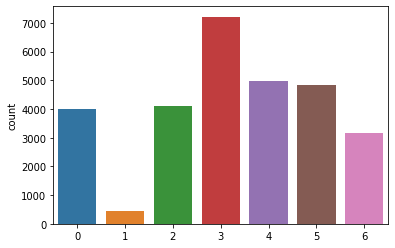

In [ ]:
sns.countplot(x = train_dataset.classes);

In [ ]:
# Creating the test dataset using ImageDataGenerator
test_generator = ImageDataGenerator(rescale=1./255)

test_dataset = test_generator.flow_from_directory('/content/fer2013/validation',
                                                  target_size = (48, 48),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 3589 images belonging to 7 classes.


## **4. Building and Training the Convolutional Neural Network**

In [ ]:
# Based on: https://github.com/rajeevratan84/DeepLearningCV/blob/master/18.2%20Building%20an%20Emotion%20Detector%20with%20LittleVGG.ipynb
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow
# BatchNormalization: https://keras.io/api/layers/normalization_layers/batch_normalization/
# Dropout: https://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf
num_detectors = 32
num_classes = 7
width, height = 48, 48
epochs = 70

network = Sequential()

network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same', input_shape = (width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))
print(network.summary())

In [ ]:
# Compile the model
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
network.fit(train_dataset, epochs=epochs)

Epoch 1/70
1795/1795 [==============================] - 81s 36ms/step - loss: 1.8551 - accuracy: 0.2675
Epoch 2/70
1795/1795 [==============================] - 62s 34ms/step - loss: 1.5744 - accuracy: 0.3834
Epoch 3/70
1795/1795 [==============================] - 61s 34ms/step - loss: 1.4074 - accuracy: 0.4588
Epoch 4/70
1795/1795 [==============================] - 64s 36ms/step - loss: 1.3178 - accuracy: 0.5027
Epoch 5/70
1795/1795 [==============================] - 62s 35ms/step - loss: 1.2625 - accuracy: 0.5252
Epoch 6/70
1795/1795 [==============================] - 63s 35ms/step - loss: 1.2181 - accuracy: 0.5449
Epoch 7/70
1795/1795 [==============================] - 62s 34ms/step - loss: 1.1824 - accuracy: 0.5592
Epoch 8/70
1795/1795 [==============================] - 61s 34ms/step - loss: 1.1574 - accuracy: 0.5712
Epoch 9/70
1795/1795 [==============================] - 63s 35ms/step - loss: 1.1353 - accuracy: 0.5767
Epoch 10/70
1795/1795 [==============================] - 61s 34m

## **5. Saving and loading the model**

In [ ]:
model_json = network.to_json()
with open('network_emotions.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights_emotions.hdf5')

In [ ]:
with open('/content/drive/MyDrive/Masterclass /Masterclass/Weights/weights_emotions.hdf5', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/drive/MyDrive/Masterclass /Masterclass/Weights/weights_emotions.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
network_loaded.summary()

In [ ]:
network_loaded = network

## **6. Evaluating the neural network**

In [ ]:
network_loaded.evaluate(test_dataset)

In [ ]:
predictions = network_loaded.predict(test_dataset)
predictions

In [ ]:
predictions = np.argmax(predictions, axis = 1)
predictions

In [ ]:
test_dataset.classes

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

In [ ]:
test_dataset.class_indices

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
cm

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

## **7. Classifying multiple images**

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Masterclass /Masterclass/Images/faces_emotions.png')
cv2_imshow(image)

In [ ]:
# Define the face detector object
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Masterclass /Masterclass/Cascades/haarcascade_frontalface_default.xml')

In [ ]:
# Detect the faces from our image
faces = face_detector.detectMultiScale(image)
faces

In [ ]:
test_dataset.class_indices.keys()

In [ ]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

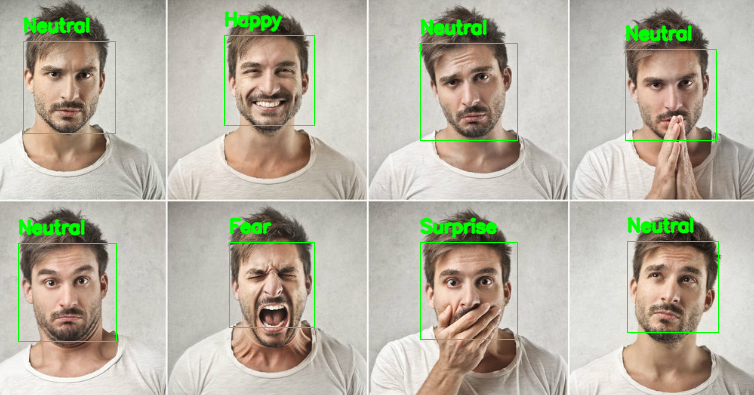

In [ ]:
# Detect the emotions and display it on the screen
for (x, y, w, h) in faces:

  # Drewing rectangle around the faces
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
  
  # Preprocess the face before we send it to the model
  roi = image[y:y + h, x:x + w]
  roi = cv2.resize(roi, (48, 48))
  roi = roi / 255
  roi = np.expand_dims(roi, axis = 0)

  # Show the prediction on the image
  prediction = network_loaded.predict(roi)
  cv2.putText(image, emotions[np.argmax(prediction)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)

cv2_imshow(image)

## Classifying emotions in videos

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Videos/emotion_test01.mp4')
connected, video = cap.read()
print(connected, video.shape)

True (360, 640, 3)


In [ ]:
# fourcc.org
save_path = '/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Videos/emotion_test01_result.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0]))

In [ ]:
while (cv2.waitKey(1) < 0):
  connected, frame = cap.read()
  if not connected:
    break
  faces = face_detector.detectMultiScale(frame, scaleFactor=1.2, minNeighbors=5, minSize=(30,30))
  if len(faces) > 0:
    for (x, y, w, h) in faces:
      frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
      roi = frame[y:y + h, x:x + w]
      roi = cv2.resize(roi, (48, 48))
      roi = roi / 255
      roi = np.expand_dims(roi, axis = 0)
      prediction = network_loaded.predict(roi)

      if prediction is not None:
        result = np.argmax(prediction)
        cv2.putText(frame, emotions[result], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)
  
  cv2_imshow(frame)
  output_video.write(frame)

print('End')
output_video.release()
cv2.destroyAllWindows()

File was too big to display video in Github so we display only one image frim video

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Final Project/Human Analysis/Face Analysis.png')

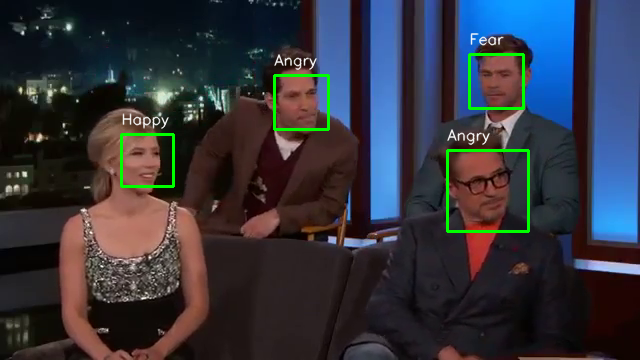

In [ ]:
cv2_imshow(image)